In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/apolloos/CS_5805(Machine_learning)/man0ZZZ.github.io/posts/Clustering':
  os.chdir(r'/Users/apolloos/CS_5805(Machine_learning)/man0ZZZ.github.io/posts/Clustering')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/yz/9_3w8_1j16g4r8mnf_4c_6pm0000gn/T/ipykernel_17919/2266283208.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/apolloos/anaconda3/lib/python3.11/importlib/_bootstrap.py": 1694439058.586277, "/Users/apolloos/anaconda3/lib/python3.11/importlib/_bootstrap_external.py": 1694439058.588179, "/Users/apolloos/anaconda3/lib/python3.11/zipimport.py": 1694439057.809952, "/Users/apolloos/anaconda3/lib/python3.11/codecs.py": 1694439057.572709, "/Users/apolloos/anaconda3/lib/python3.11/encodings/aliases.py": 1694439058.134947, "/Users/apolloos/anaconda3/lib/python3.11/encodings/__init__.py": 1694439058.132963, "/Users/apolloos/anaconda3/lib/python3.11/encodings/utf_8.py": 1694439058.359777, "/Users/apolloos/anaconda3/lib/python3.11/abc.py": 1694439057.54054, "/Users/apolloos/anaconda3/lib/python3.11/io.py": 1694439057.639787, "/Users/apolloos/anaconda3/lib/python3.11/stat.py": 1694439057.744279, "/Users/apolloos/anaconda3/lib/python3.11/_collections_abc.py": 1694439057.519174, "/Users/apolloos/anaconda3/lib/python3.11/genericpath.py": 1694439057.614934, "/Users/apolloos/anaconda3/lib/python3.11/posi

In [2]:
import pandas as pd
import numpy as np
import numpy as npd
import matplotlib.pyplot as plt

In [3]:
#load the datasets
df_test=pd.read_csv('./test.csv')
df_train=pd.read_csv('./train.csv')

In [4]:
#| echo: false
df_train.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [5]:
df = df_train
all_col = [x for x in df_train.columns]
all_col = all_col[:-1]
y = df['price_range']
cat_col=['blue','three_g', 'dual_sim', 'four_g', 'wifi', 'touch_screen']

In [6]:
anova_dict = {}
for col in all_col:
  if col not in cat_col:
    for i in df['price_range'].unique():
      var_name = f"feat_{col}_{i}"
      var_value = df[df['price_range']==i][col].values
      anova_dict[var_name]=var_value

In [7]:
from scipy.stats import f_oneway
f_stat_all = []
p_val_all = []
for col in all_col:
  keys_all = []
  for key, value in anova_dict.items():
    if str(col) in str(key):
      keys_all.append(key)
  if len(keys_all) > 0:
    f_stat, p_val = f_oneway(anova_dict[keys_all[0]], anova_dict[keys_all[1]], anova_dict[keys_all[2]], anova_dict[keys_all[3]])
    f_stat_all.append(f_stat)
    p_val_all.append(p_val)

In [8]:
anova_table = pd.DataFrame([[col for col in all_col if col not in cat_col], f_stat_all, p_val_all], index=['features', 'f_statistic', 'p_value']).T
anova_table

,features,f_statistic,p_value
0,battery_power,31.598158,0.0
1,clock_speed,0.493708,0.686675
2,fc,0.772182,0.509504
3,int_memory,2.922996,0.032777
4,m_dep,1.500682,0.212459
5,mobile_wt,3.594318,0.013117
6,n_cores,2.625415,0.048936
7,pc,0.825446,0.479749
8,px_height,19.484842,0.0
9,px_width,22.620882,0.0


In [9]:
selected_features=[x for x in anova_table[anova_table['p_value'] < 0.05]['features'].values]
selected_features

['battery_power',
 'int_memory',
 'mobile_wt',
 'n_cores',
 'px_height',
 'px_width',
 'ram']

In [10]:
df = df_test.loc[:,selected_features]
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = df.values
X_tr = mms.fit_transform(X)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tr)
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

In [12]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

For n_clusters = 2 The average silhouette_score is : 0.309903131228774
For n_clusters = 3 The average silhouette_score is : 0.3760007433407918


For n_clusters = 4 The average silhouette_score is : 0.37658001251847256
For n_clusters = 5 The average silhouette_score is : 0.3442148747365973


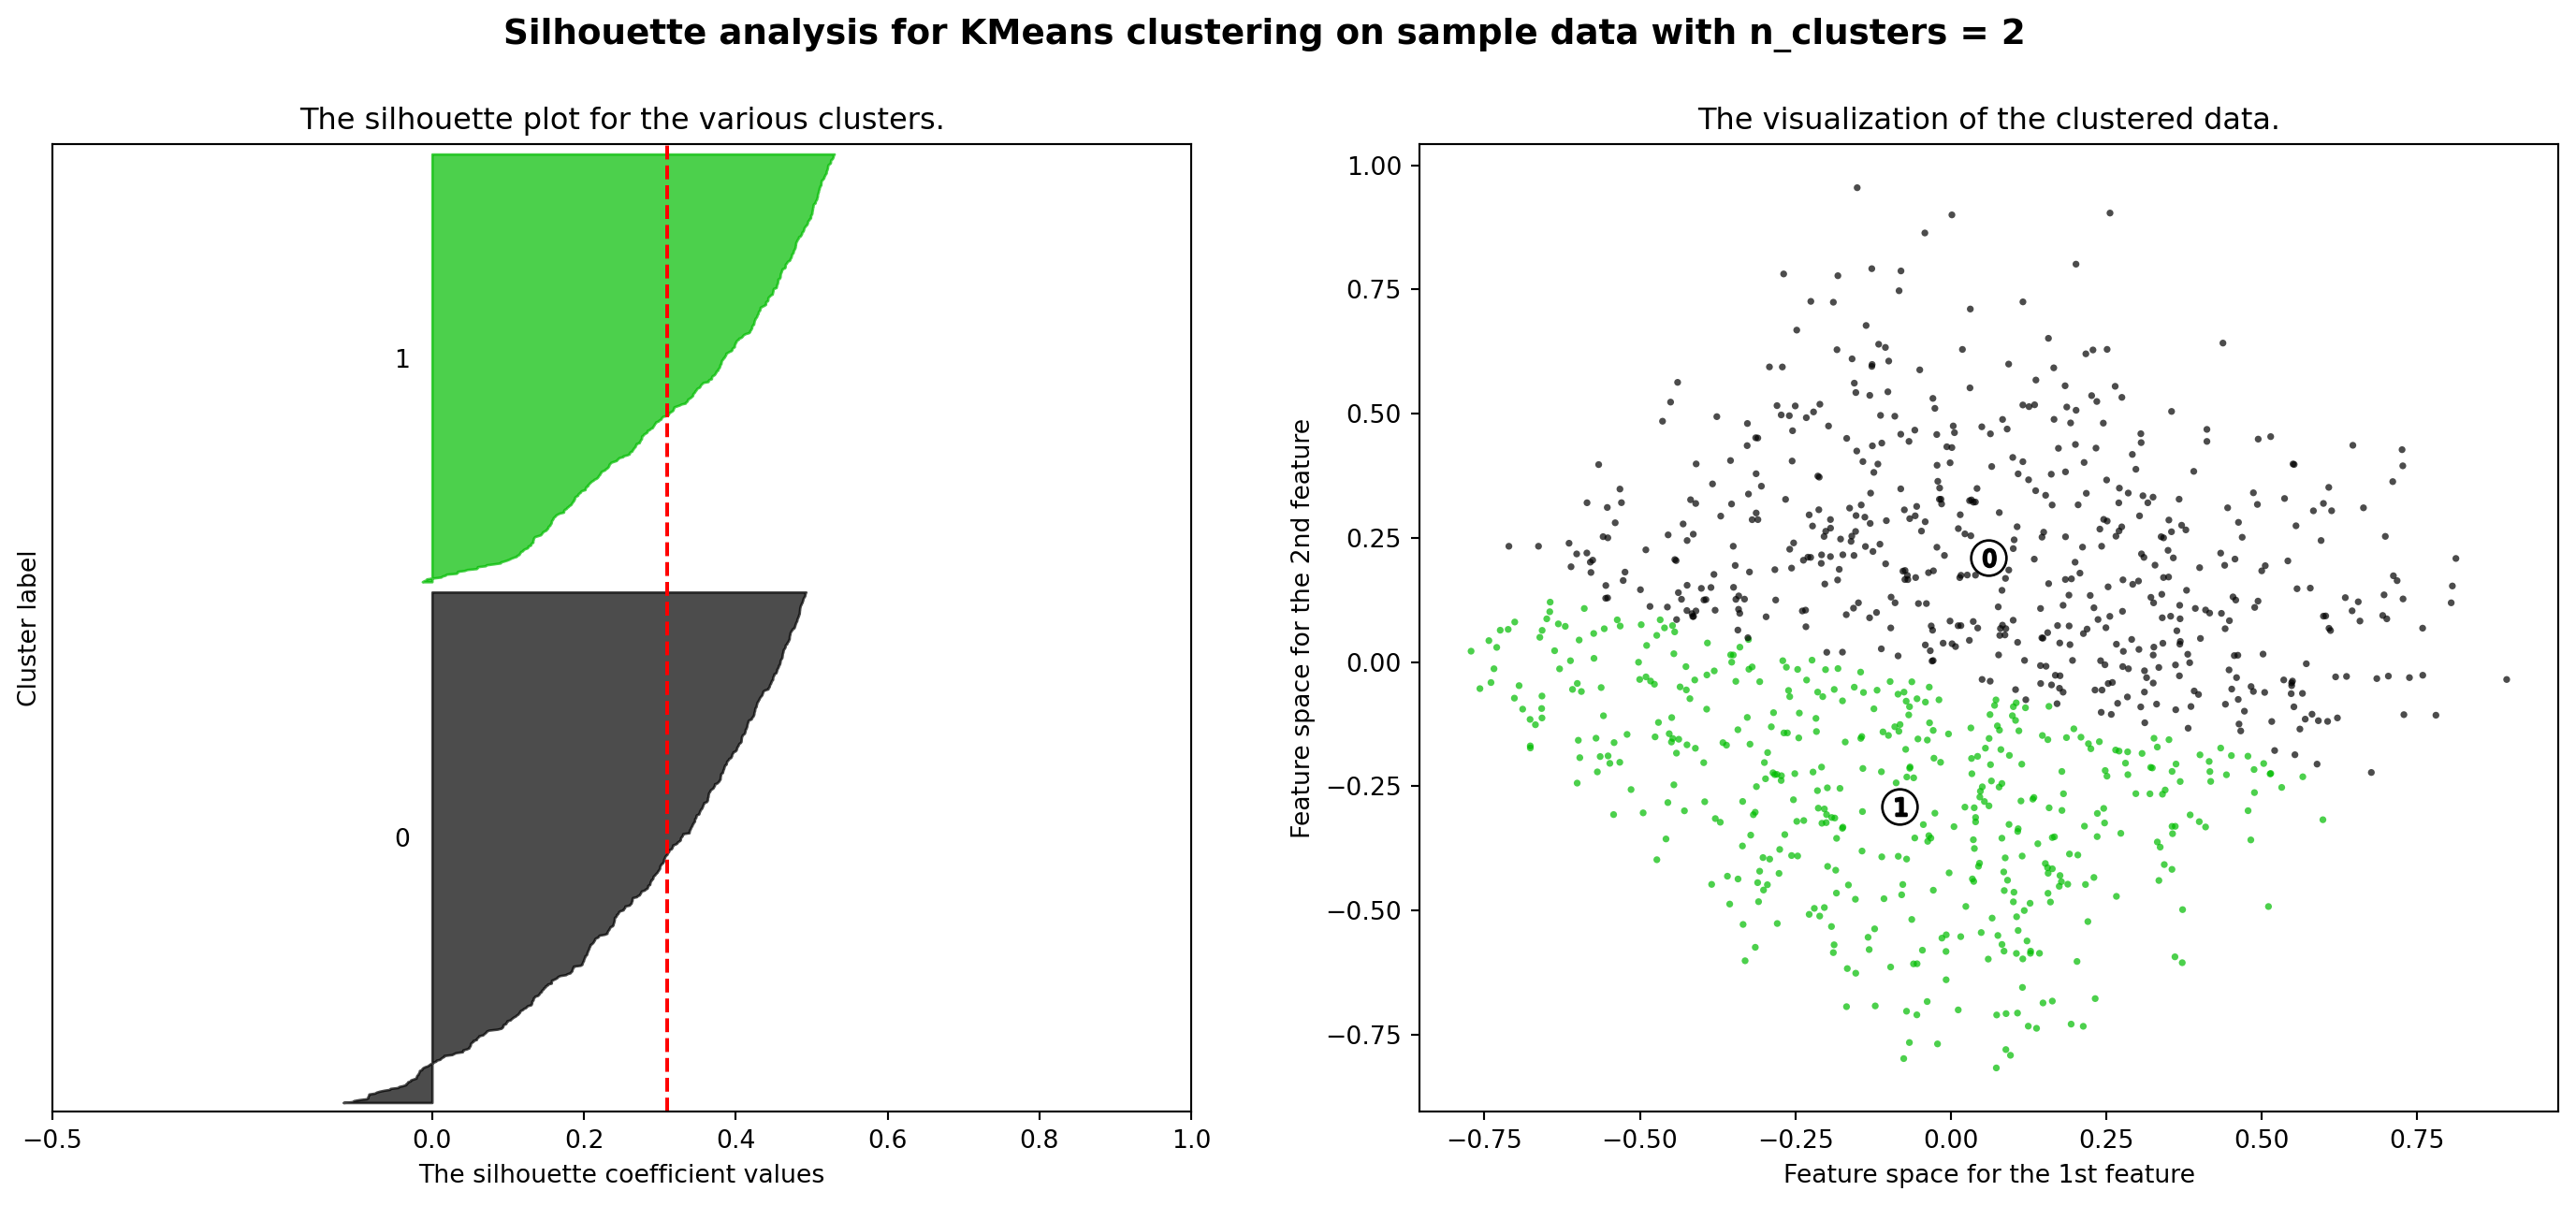

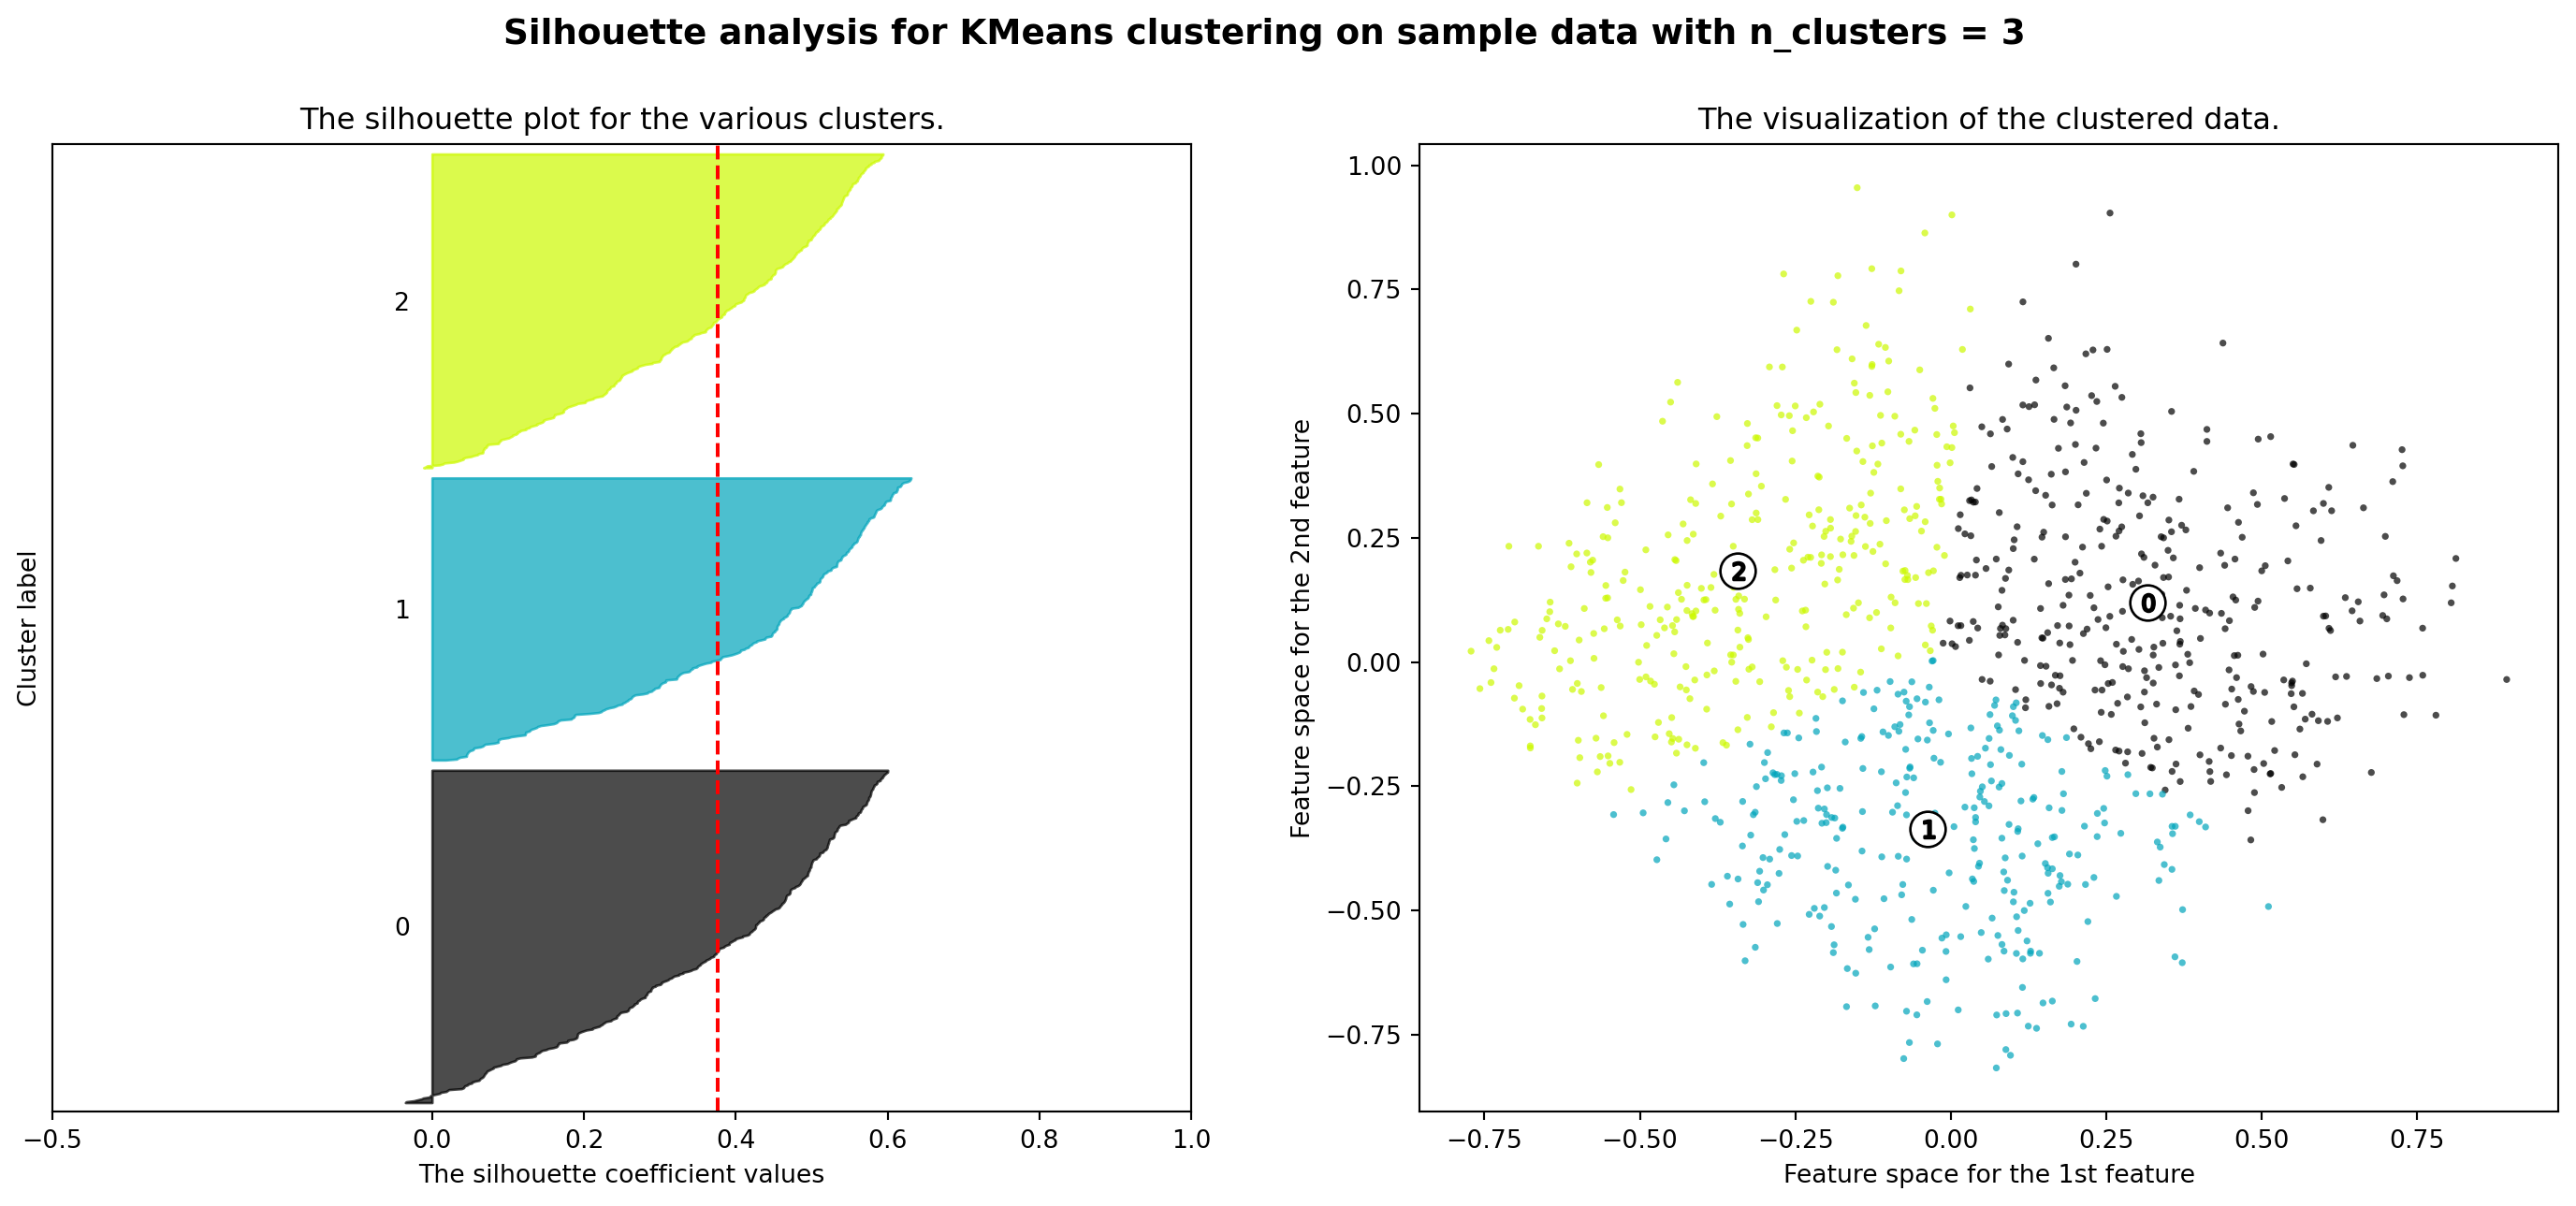

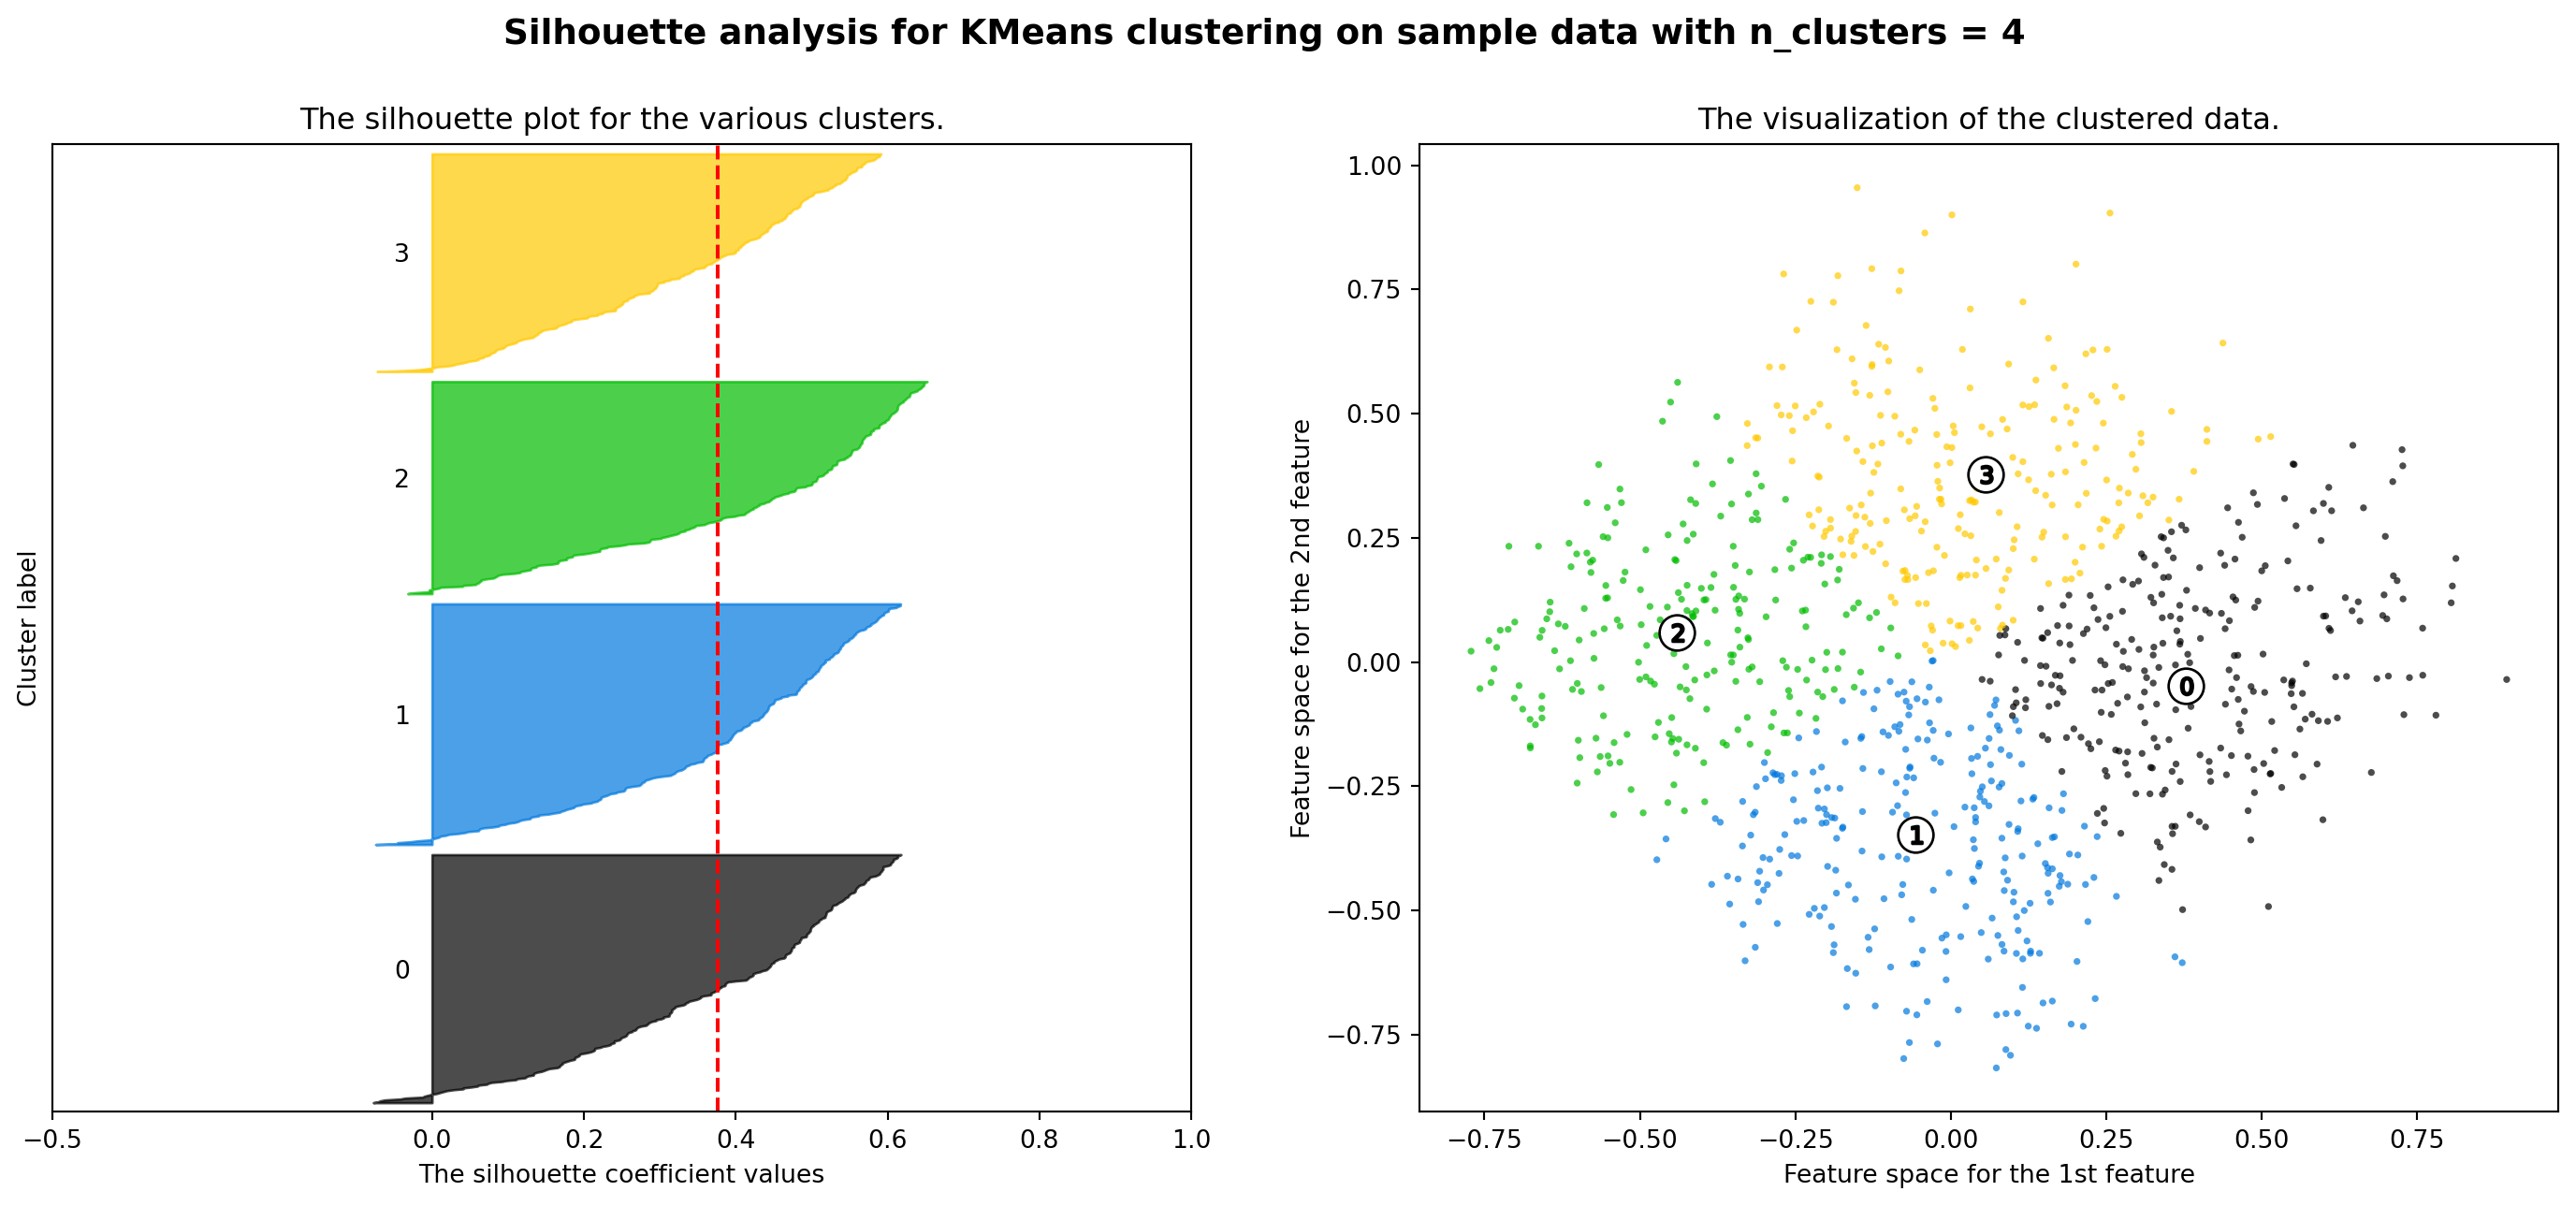

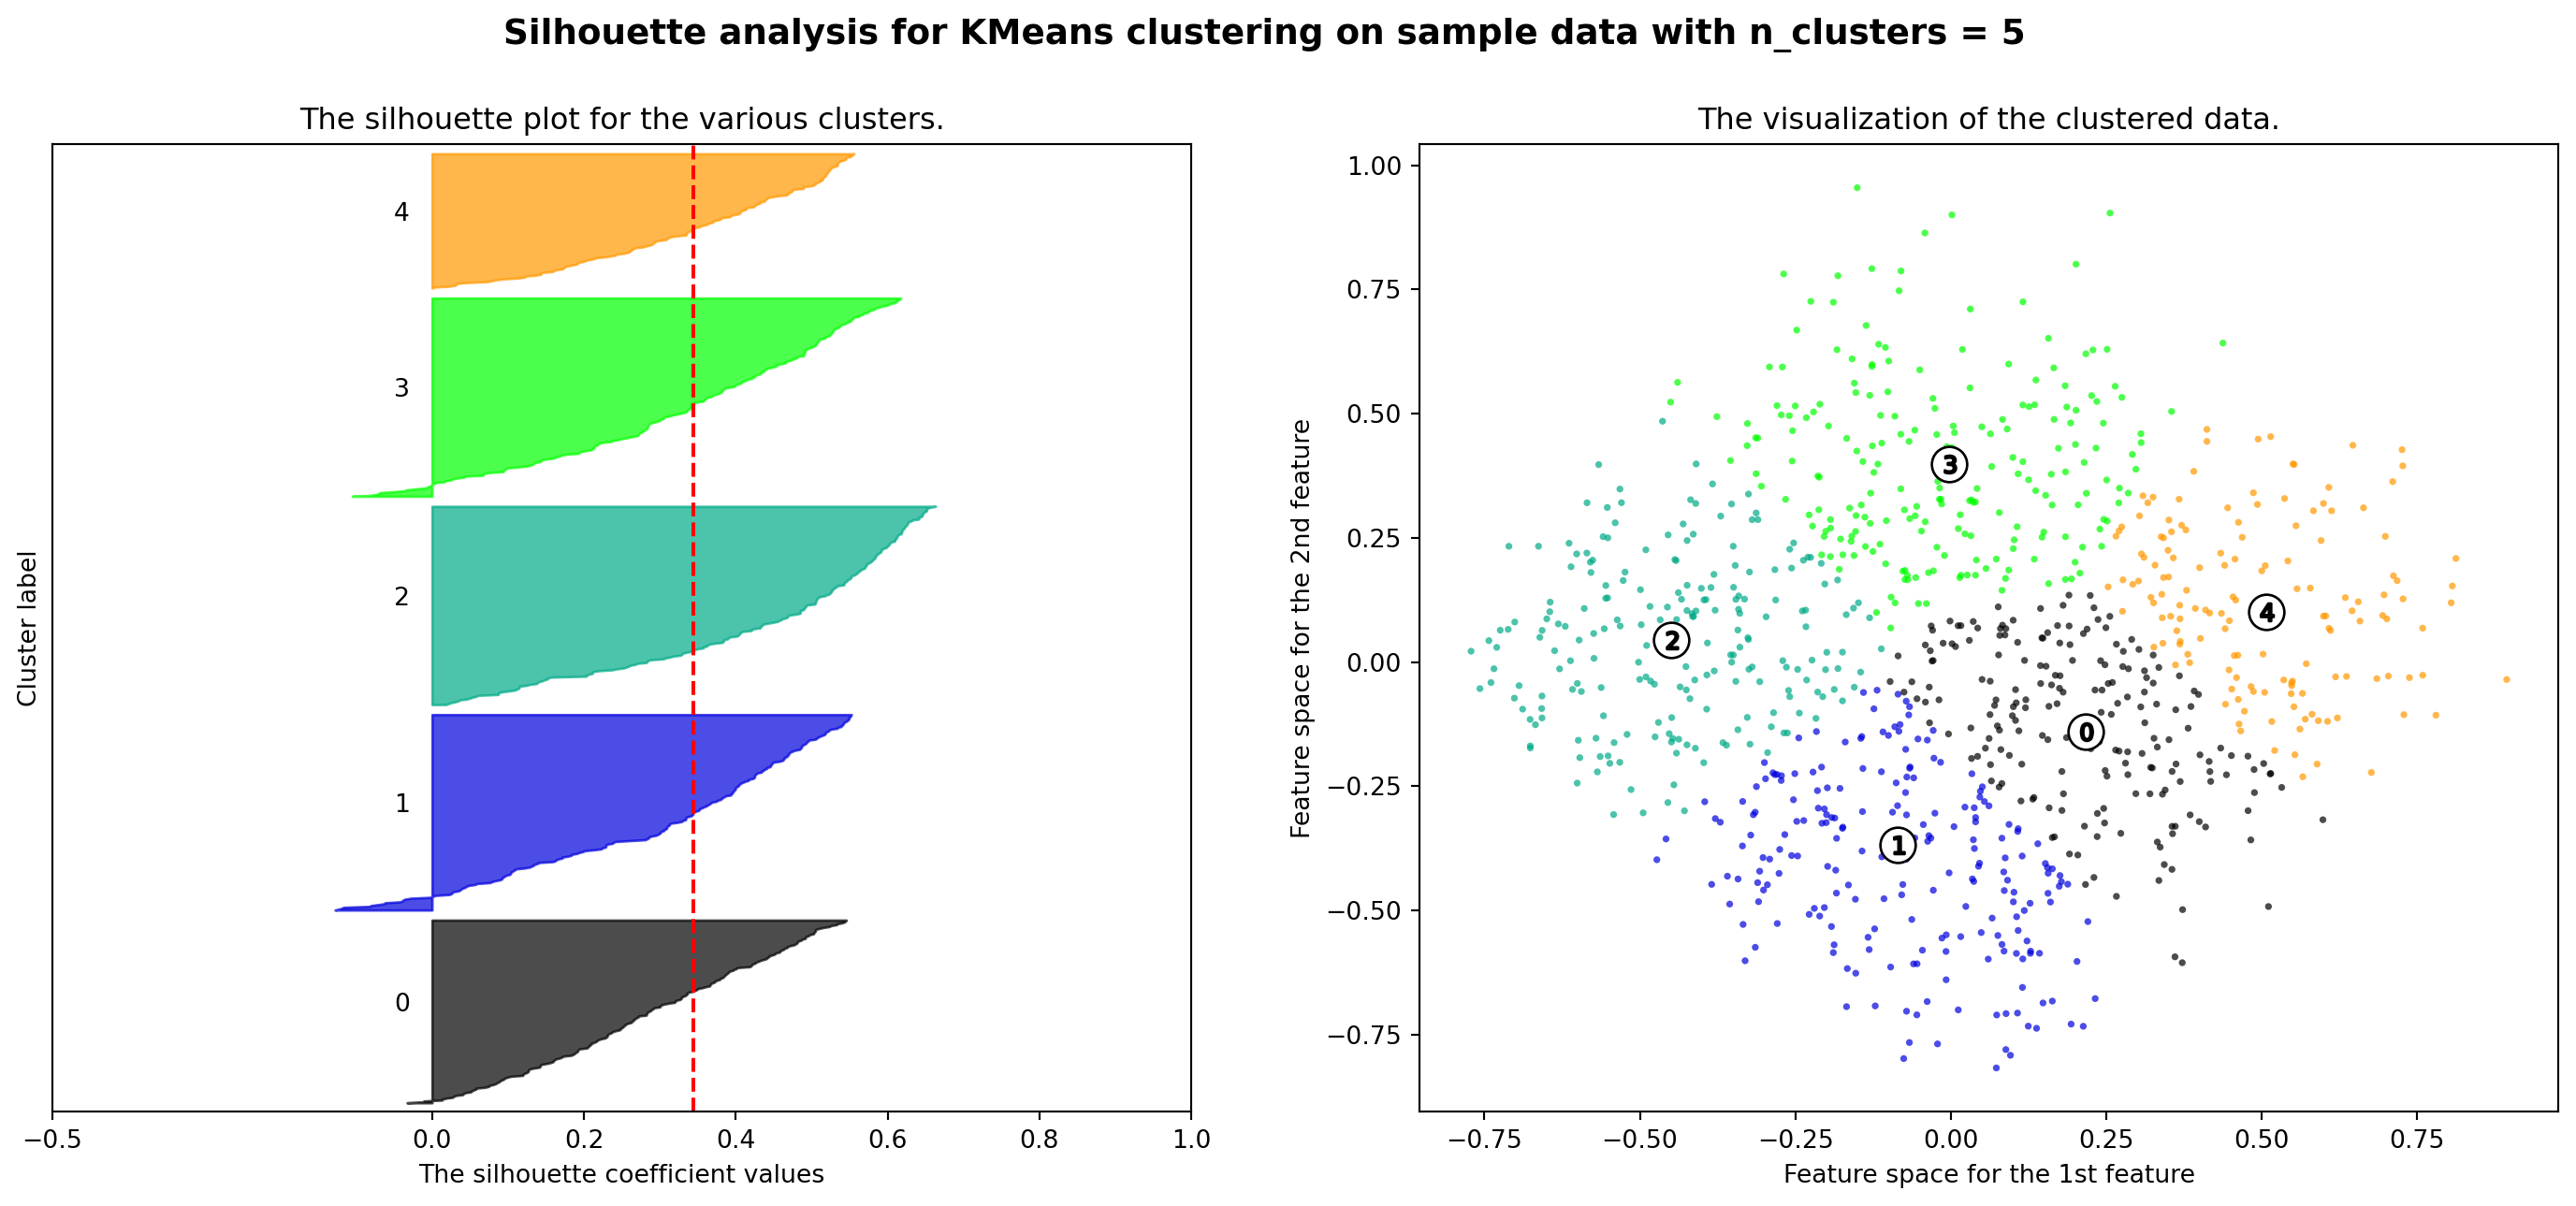

In [13]:
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.5, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = MiniBatchKMeans(n_clusters=n_clusters, n_init='auto', random_state=0)
    cluster_labels = clusterer.fit_predict(X_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.5, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_pca[:, 0], X_pca[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

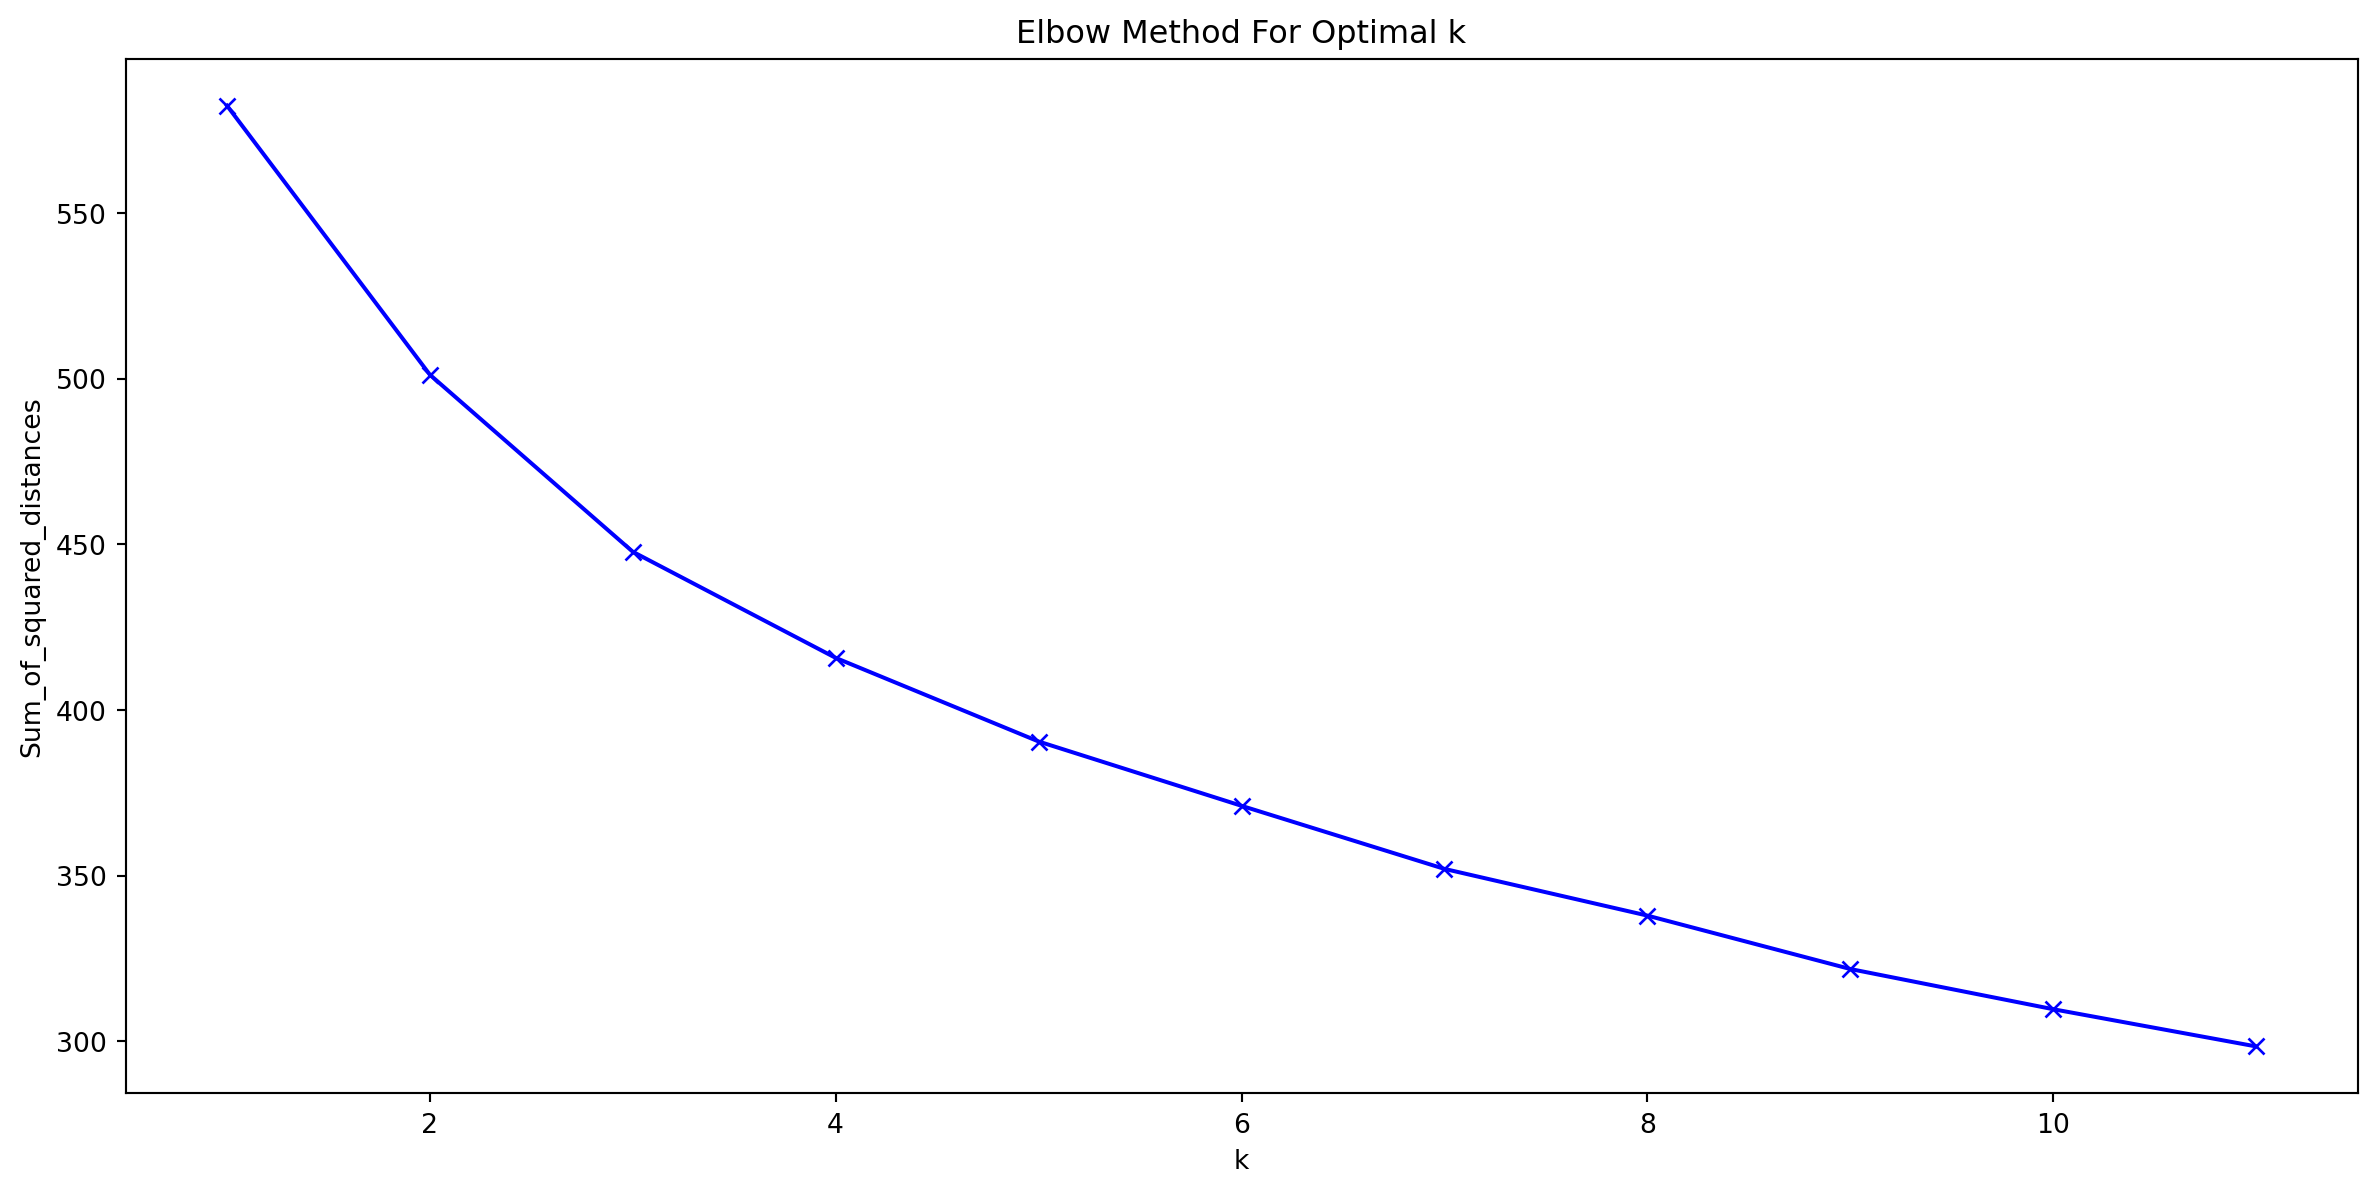

In [14]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
Sum_of_sq_distances = []
K = range(1,12)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(X_tr)
    Sum_of_sq_distances.append(km.inertia_)
plt.figure(figsize=(15,7))
plt.plot(K, Sum_of_sq_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

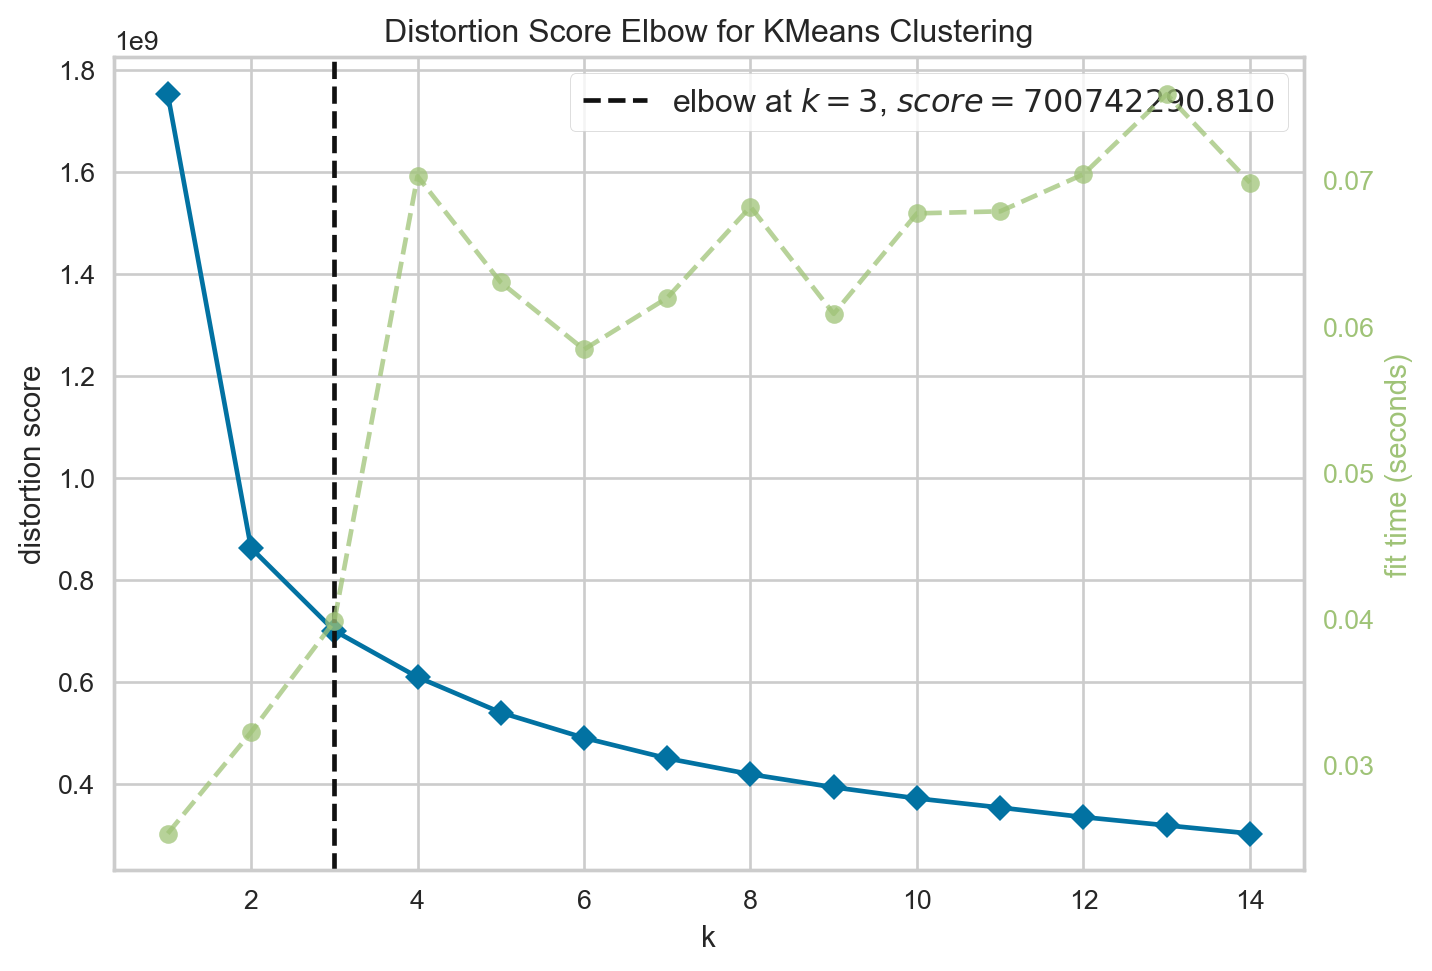

In [15]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(1, 15))
elbow.fit(X)
elbow.show()
import warnings
warnings.filterwarnings("ignore")

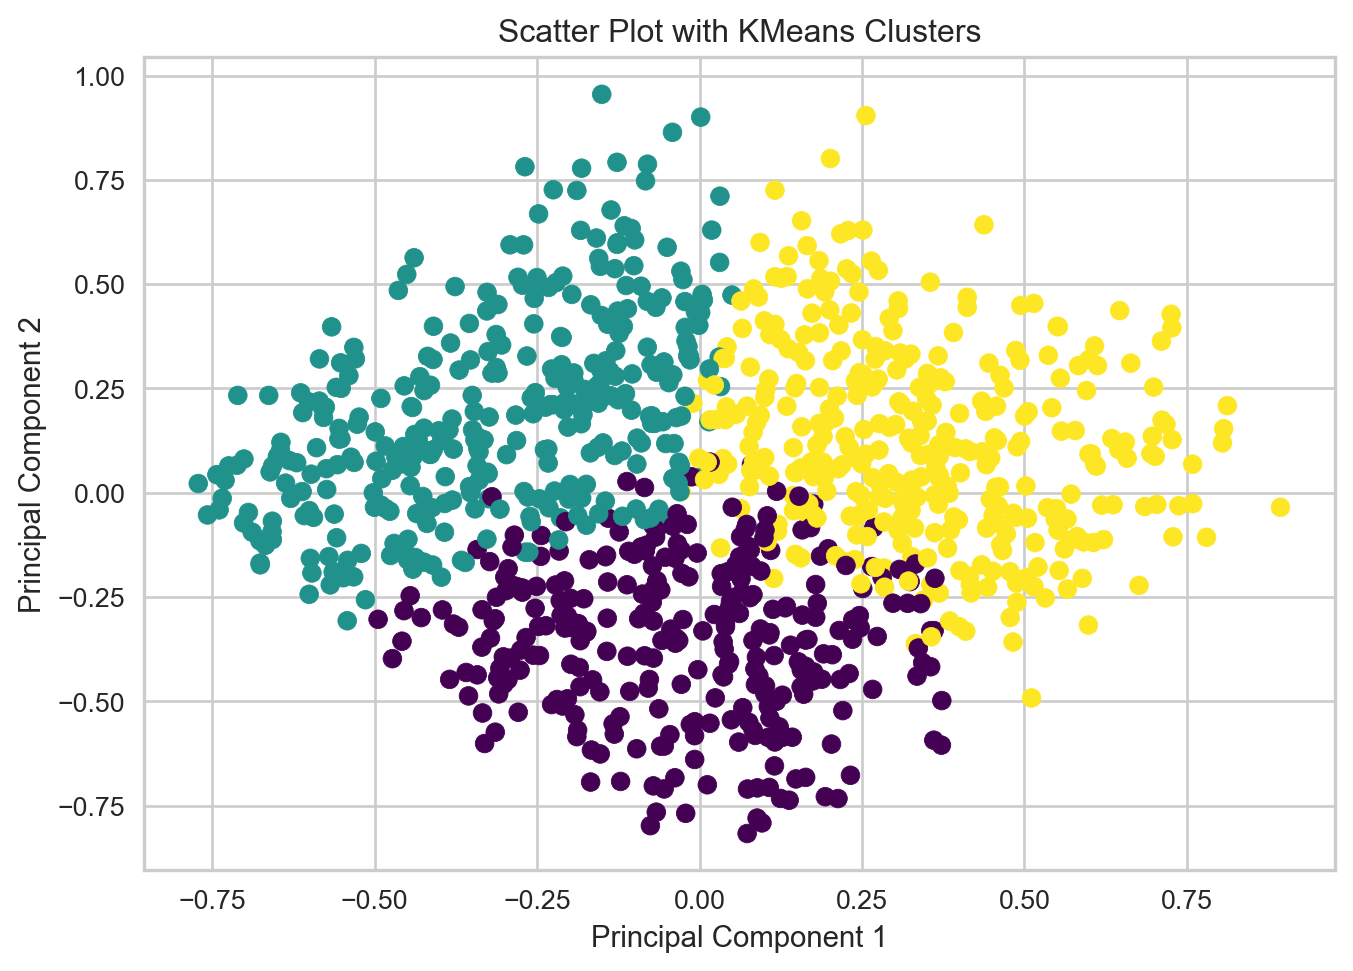

In [16]:
km = KMeans(n_clusters = 3)
km.fit(X_tr)
df['Cluster'] = km.labels_
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Scatter Plot with KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()